# Skill Homework #5 - Basic Plotting
----
# Plotting with `matplotlib`
The python module `matplotlib` is a very widely used package. It is based on the plotting in the commercial program `Matlab`. There are several way to import and use `matplotlib`. We will use what is called the *object-oriented* approach. You can see in the cell below how the module is imported in this approach.

The line `%matplotlib inline` tells jupyter to display the plots in this web browser page.

Run the cell below to read in the `numpy` and `matplotlib` modules and set up the inline plots.

To get you started I put in some code to create some data.
```
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#
# Now make some data
np.random.seed(20150108) # seed the random number generator so eveyone has the same data
time = np.linspace(0, 2, 101)
volts = 2.5 * np.sin(2 * np.pi * time + 1.0) + np.random.normal(0,0.1,len(time))
vModel = 2.5 * np.sin(2 * np.pi * time + 1.0)
```

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#
# Now make some data
np.random.seed(20150108) # seed the random number generator so eveyone has the same data
time = np.linspace(0, 2, 101)
volts = 2.5 * np.sin(2 * np.pi * time + 1.0) + np.random.normal(0,0.1,len(time))
vModel = 2.5 * np.sin(2 * np.pi * time + 1.0)

# Quick and Dirty Plots
I hesitate even showing you how to do this, but *quick and dirty* plots can be made with the one line of code: 
```
plt.plot(time, volts)
```
Go ahead and run this in the cell below.

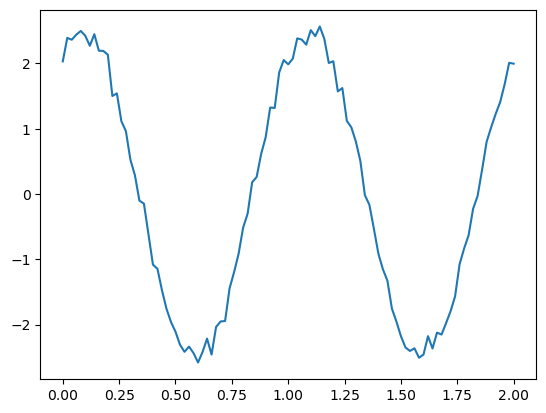

In [2]:
plt.plot(time, volts)

# Object-Oriented Plotting
To make a minimally satisfactory plot, you need axis labels, and to change the plot from a line to points. These and many other plot features are easier to do with an *object oriented* approach. Object oriented means you create an object, then call that object's methods to modify it.

First you need a ***figure***. A figure is the canvas or space onto which the plot is drawn. The basic call to create a figure is 
```
fig = plt.figure()
```
Run by itself, you will not see anything happen.

Second, you need ***axes*** in the figure. The easiest way to do this is running 
```
ax = fig.add_subplot(111)
```
You can see that `fig` has a method `add_subplot`. `sub_plot` can configure multiple plots in one figure. The odd argument `111` means one row of figures, one column of figures, and these are the axes for the first figure.

Finally, you need your plot. This takes the form 
```
pl1 = ax.plot(time, volts)
```
Note that each time you create an object, you save a reference to it by the `=` operator.

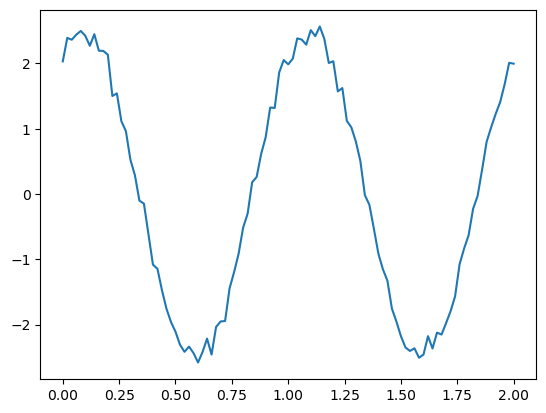

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
pl1 = ax.plot(time, volts)

## Dressing up the Plot
It is in embellishing the plot that the object-oriented approach helps. Every plot needs two things: a title, and axis labels. These are added with methods on the axis object.
```
ax.set_xlabel("myXLabel")
```
sets `"myXLabel"` as the x label. Your label should have a one or two word description followed by the units in parentheses, like `Time (s)`. Similarly, the method for adding a y label is 
```
ax.set_ylabel(FILL THIS IN)
```

To add a title, the method is 
```
ax.set_title(GIVE ME A TITLE)
```
Give the plot the title `Sensor Output`.

Unfortunately, jupyter can't modify the plot in a previous cell. So, in the cell below, copy and paste the code, then add the code for adding the labels and title.

Text(0.5, 1.0, 'Time vs Volts')

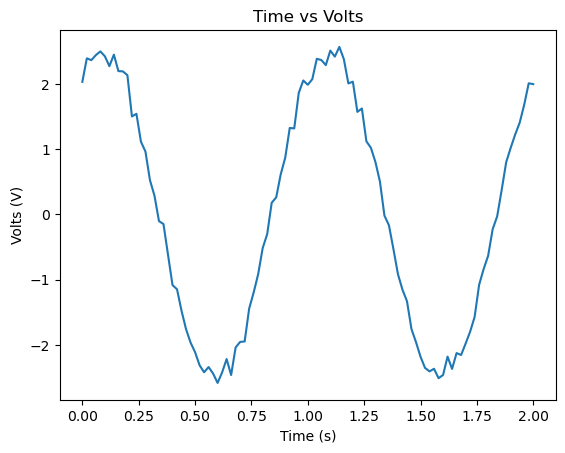

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
pl1 = ax.plot(time, volts)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Volts (V)")
ax.set_title("Time vs Volts")

# Multiple Lines on Plot
## Symbols, Colors, and Line Types
One problem with the above plot is that since the data is not smooth, it should be plotted with dots or symbols. Data should almost always be plotted with dots or symbols. `matplotlib`, like `Matlab`, dies this with a formatting parameterin the `plot` command. You can append and optional third parameter after the y array with formatting information about the plot line. This formatting is a very compact string with the line type, the symbol, and the color encoded in a three character string. Here are some examples:
* `'-k'` - plots only a black line. (`k` means blac***k***.)
* `'.r'` - plots only dots in the color red
* `'--g'` - plots only a green dashed line
* `'ob'` - plots only circles in blue
* `'^:m'` - plots triangle connected by a dotted line in magenta
* `help(plt.plot)` is always available with more options and details

Other colors are `y` and `c`. Other symbols are `v`, `*`, `+`, `x`, `'s'`, and `d`. Another line types is `'-.'`. Your plot should have a line like
```
ax.plot(time, volts, '.b')
```
and another line to plot model as a solid red line.

## Adding More Lines to a Plot
Adding another line (or set of symbols) to the plot is just a matter of adding another `ax.plot` call. Each sucessive call of `plot` will add another line to the axis.

Copy and paste your previous code in the cell below. Then modify it to plot the data points in blue dots without a line, and the model `vModel` as a red smooth line.

## It Should Look Like This ... 
![No Text](Figures/Skill05-1.png)
If yours does not, keep trying until it does.

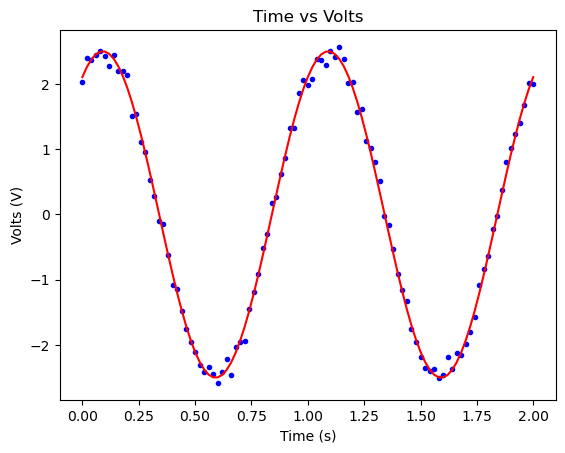

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
#pl1 = ax.plot(time, volts)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Volts (V)")
ax.set_title("Time vs Volts")

ax.plot(time, volts, '.b')
ax.plot(time, vModel, 'r')

# Legends and a Grid
The next two modifications are optional. Often it is useful to have background grid on your plots. This is done by calling `ax.grid()`.

Next, sometimes you are plotting multiple data sets or models on the graph, so you need a *legend* to help the reader decode what you plotted. There are two steps to doing this.
1. In each call to `plot`, add a parameter like `label="Data"`. Whatever string you assign to `label` will be used in making a legend.
2. Add a call 
```
ax.legend()
```
after your last call to `plot`. This turns on the legend.

In the cell below, add a grid and legend to your plot.

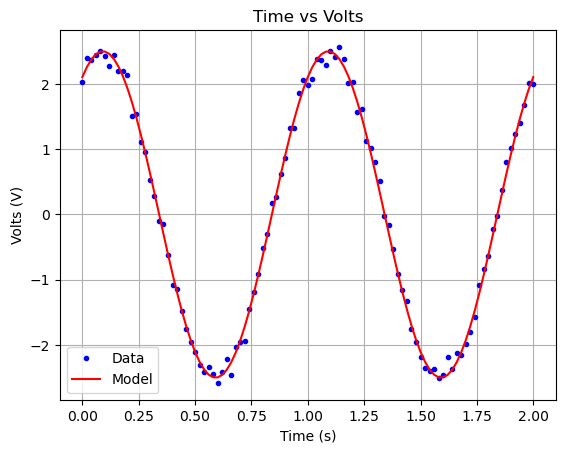

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
#pl1 = ax.plot(time, volts)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Volts (V)")
ax.set_title("Time vs Volts")

ax.plot(time, volts, '.b', label="Data")
ax.plot(time, vModel, 'r', label = "Model")

ax.grid()
ax.legend()

# Setting Axis Limits
Usually `matplotlib` chooses the axis limits well, but sometimes the default limits need to be adjusted. The methods 
```
ax.set_xlim(min,max)
ax.set_ylim(min,max)
```
set the limits to your choice. For example setting the y limits from -2.8 to 3.8 leaves better room for the legend box.

Copy and paste your previous code and add both x and y limits to the plot. Also expanding the x limits a little bit, like 0.1 could show better where the data begins and ends.

# Your Best Shot
![No Text](Figures/Skill05-2.png)

It should look like the figure above.

(-2.8, 3.8)

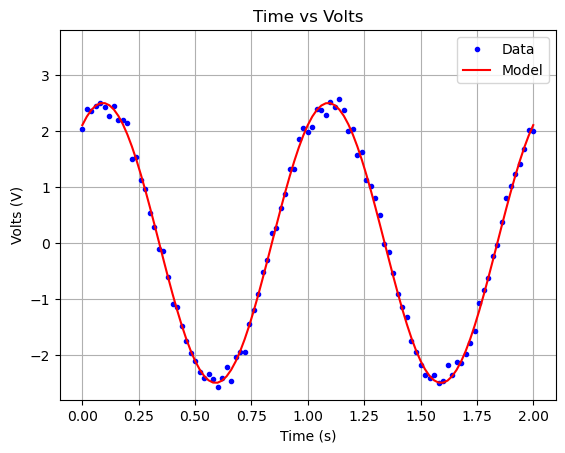

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
#pl1 = ax.plot(time, volts)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Volts (V)")
ax.set_title("Time vs Volts")

ax.plot(time, volts, '.b', label="Data")
ax.plot(time, vModel, 'r', label = "Model")

ax.grid()
ax.legend()

ax.set_xlim(-0.1,2.1)
ax.set_ylim(-2.8,3.8)

----
# Additional Topics
----
# Logarithmic Axes
Sometimes your data or models are shown better with a logarithmic axis for one or both axes. The methods 
```
ax.set_yscale('log')
ax.set_xscale('log')
```
change the scaling on the respective axes.

Use the following code in the cell below to generate more data
```
volts2 = 3 * np.exp(-time/0.25)
```
Then plot it using a logarithmic y-axis.

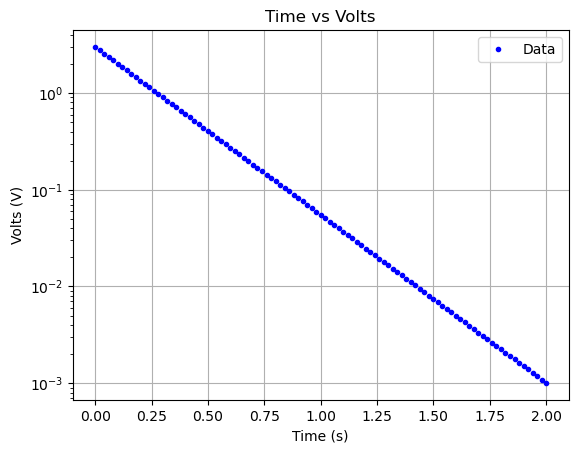

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
#pl1 = ax.plot(time, volts)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Volts (V)")
ax.set_title("Time vs Volts")

ax.plot(time, volts2, '.b', label="Data")

ax.grid()
ax.legend()

#ax.set_xlim(-0.1,2.1)
#ax.set_ylim(-2.8,3.8)


ax.set_yscale('log')

volts2 = 3 * np.exp(-time/0.25)

## Log-Log Plot
Now to demonstrate the log-log plot, create the following data:
```
time3 = time[1:]
volts3 = time3 ** -2
```
We want to plot this data in plot linear and log-log axis scaling. The example below does some fancy figure handling.
1. I set the `figsize` manually to be extra wide by using 
```
fig = plt.figure(figsize=(12,5))
```
2. I add a subplot axis using `121`. This means there will be one *row* amd two *columns* of plots, and this plot will be the first.
3. The next set of axes are the second one, so it will be in the second columns. Note the first two numbers have to match.
4. I set the scales only on the second axis.
5. I use a `for` loop to loop over both sets of axes. It turns out that the variable `fig.axes` is a list of all of the axes in the current figure.
6. In the loop I set the labels and turn on the grids. Here is part of the code to do this
```
for ax in fig.axes:
    ax.set_title("Amplifier Output")
    SET THE X LABEL
    SET THE Y LABEL
    TURN ON THE GRID
```

# Plot
![](Figures/Skill05-3.png)

Keep trying until it looks like the above plots.

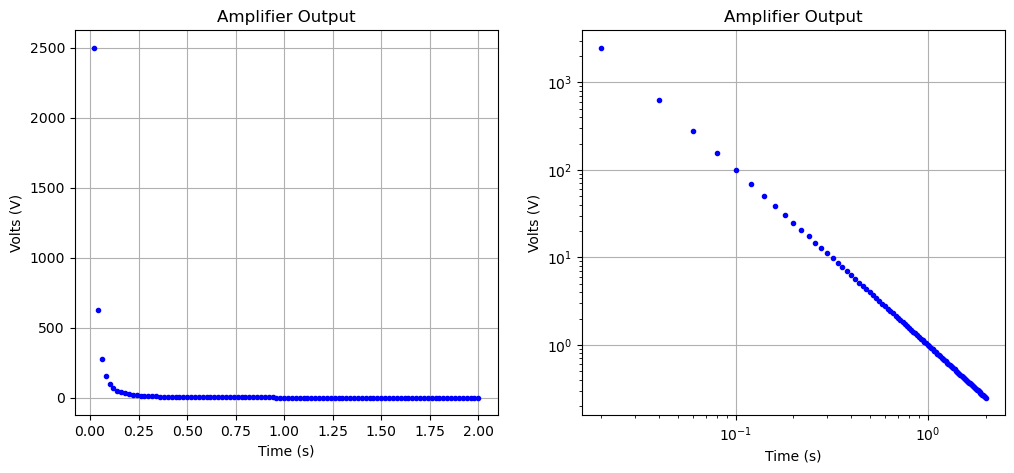

In [44]:
time3 = time[1:]
volts3 = time3 ** -2

#fig = plt.figure(figsize=(12,5))

fig, axs = plt.subplots(ncols=2, figsize=(12,5))

for ax in fig.axes:
    ax.set_title("Amplifier Output")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Volts (V)")
    ax.plot(time3, volts3, '.b', label="Data")
    ax.grid()
    
axs[1].set_yscale('log')
axs[1].set_xscale('log')

----
# Saving Figures
Saving plots as graphics is a simple call to the method 
```
fig.savefig(fileName, dpi=dotsPerInch)
```
where the argument `dpi=dotsPerInch` is optional. The type of file produced is determined by the extension of the file name. Here are the file types I suggest:
1. `.png` with `dpi=200` - this makes a nice large file you can include in any document. The quality comes out better than if you use a `.jpg` file.
2. `.svg` with not `dpi` - this is a *vector* image file. Everything is describes by coordinates and sizes. This file scale to differnt sizes very well. This is a good choice if you are making a poster with large figures.
3. `.pdf` with `dpi=200` - sometimes this format works better with LaTeX documents.

I usually use `.png` format files. In the cell below save the previous pair of plots in this format. 

BTW, jupyter remembers the previous plot, so you can just run the `savefig` code.

In [50]:
fig.savefig("plot.png", dpi=200)
fig.savefig("plot.svg")
fig.savefig("plot.pdf", dpi=200)

** Double Click Here to edit this hidden cell **
Here is your figure in this web page. Edit the name to match your file name. Then execute this cell by typing `<shift><enter>`.
![Alt text](test.png)

----
# More Plots
# Histograms
*Histograms* are a powerful way of graphing data that has randomness around some value. It shows how the data are randomly distributed. The x-axis are the data values, and the y-axis is a bar graph of how many times each value occurs.

The code below simulates measuring a lenth of 5 cm ten thousand times with an uncertainty of 0.1 cm.
```
np.random.seed(0)
meas1 = np.random.normal(5.0, 0.1, 10000)
```
The basic histogram method is (after you have made a figure and an axis) is `ax.hist(data)`, where `data` are the numbers you want to make a histogram of. 

Create a figure and axes, and plot this histogram.

(array([  10.,  110.,  579., 1710., 2833., 2688., 1479.,  487.,   97.,
           7.]),
 array([4.62598994, 4.70140754, 4.77682515, 4.85224276, 4.92766037,
        5.00307798, 5.07849559, 5.1539132 , 5.2293308 , 5.30474841,
        5.38016602]),
 <BarContainer object of 10 artists>)

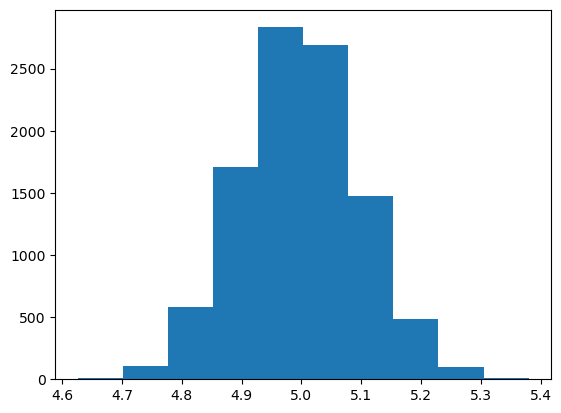

In [58]:
np.random.seed(0)
meas1 = np.random.normal(5.0, 0.1, 10000)

plt.hist(meas1)

You might note that this distribution only kind of looks like the normal (or Gaussian) distribrution you have seen before.

# Number of Bins
The most common modification to the default hostogram plot is to change the bins on the x-axis. One way is to add more bins by adding a second argument rifht after your data that is an integer setting the number of bins. 

Replot the above data with 100 bins. When you do, you should see more small tails in the histogram and it will look more like the classical normal distribution.

# Make It Look Like This ... 
![](Figures/Skill05-4.png)

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   3.,   5.,   5.,
          3.,   7.,   7.,   9.,  19.,   5.,  12.,  22.,  21.,  30.,  32.,
         30.,  39.,  41.,  57.,  70.,  88.,  88., 104., 120., 130., 135.,
        141., 139., 167., 202., 208., 228., 240., 220., 234., 273., 254.,
        299., 289., 285., 307., 342., 330., 295., 300., 323., 277., 254.,
        283., 250., 241., 242., 223., 205., 204., 177., 177., 137., 133.,
        128., 118., 102.,  98.,  82.,  73.,  76.,  60.,  44.,  38.,  38.,
         26.,  26.,  24.,  17.,  15.,  16.,  11.,  16.,   5.,   3.,   5.,
          5.,   4.,   1.,   1.,   1.,   2.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([4.62598994, 4.6335317 , 4.64107346, 4.64861522, 4.65615698,
        4.66369874, 4.6712405 , 4.67878226, 4.68632402, 4.69386578,
        4.70140754, 4.70894931, 4.71649107, 4.72403283, 4.73157459,
        4.73911635, 4.74665811, 4.75419987, 4.76174163, 4.76928339,
        4.77682515, 4.78436691, 4.79190867, 4.

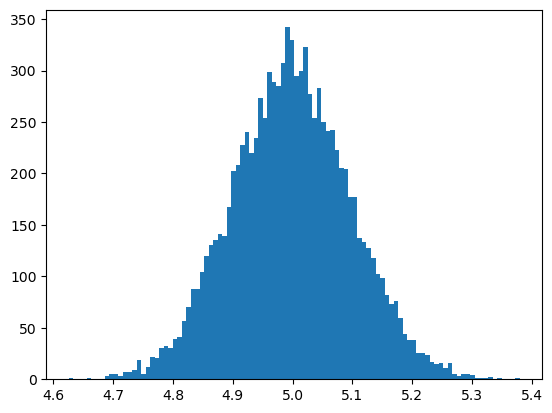

In [59]:
np.random.seed(0)
meas1 = np.random.normal(5.0, 0.1, 10000)

plt.hist(meas1,100)

Finally, there is an optional argument `log=True` that make the y-axis logarithmic. In the cell below, plot the above histogram with the log scale turned on.

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   3.,   5.,   5.,
          3.,   7.,   7.,   9.,  19.,   5.,  12.,  22.,  21.,  30.,  32.,
         30.,  39.,  41.,  57.,  70.,  88.,  88., 104., 120., 130., 135.,
        141., 139., 167., 202., 208., 228., 240., 220., 234., 273., 254.,
        299., 289., 285., 307., 342., 330., 295., 300., 323., 277., 254.,
        283., 250., 241., 242., 223., 205., 204., 177., 177., 137., 133.,
        128., 118., 102.,  98.,  82.,  73.,  76.,  60.,  44.,  38.,  38.,
         26.,  26.,  24.,  17.,  15.,  16.,  11.,  16.,   5.,   3.,   5.,
          5.,   4.,   1.,   1.,   1.,   2.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([4.62598994, 4.6335317 , 4.64107346, 4.64861522, 4.65615698,
        4.66369874, 4.6712405 , 4.67878226, 4.68632402, 4.69386578,
        4.70140754, 4.70894931, 4.71649107, 4.72403283, 4.73157459,
        4.73911635, 4.74665811, 4.75419987, 4.76174163, 4.76928339,
        4.77682515, 4.78436691, 4.79190867, 4.

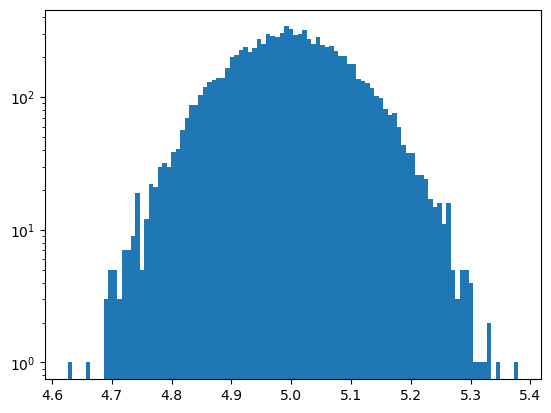

In [60]:
np.random.seed(0)
meas1 = np.random.normal(5.0, 0.1, 10000)

plt.hist(meas1,100,log=True)

Finally you can provide a list of bin boundaries as an array. The following example simulates the rolling of a pair of dice. You know there only 11 possible values from "snake eyes" or 2 to "boxcars" or 12. The default `hist` doesn't get his right without helping it out. This examples feeds it the histogram boundries.

Finally, this example demonstrates the `normed` keyword that normalized the numbers so, like a probability density, the sum adds up to 1.0.

(array([0.0132595 , 0.        , 0.        , 0.        , 0.0132595 ,
        0.        , 0.        , 0.        , 0.03977851, 0.06629751,
        0.06629751, 0.03977851, 0.09281652, 0.09281652, 0.11933553,
        0.25193056, 0.06629751, 0.15911403, 0.29170906, 0.27844956,
        0.39778509, 0.42430409, 0.39778509, 0.51712061, 0.54363962,
        0.75579167, 0.9281652 , 1.16683626, 1.16683626, 1.3789883 ,
        1.59114035, 1.72373538, 1.79003289, 1.86958991, 1.8430709 ,
        2.21433699, 2.67841959, 2.75797661, 3.02316666, 3.1822807 ,
        2.91709064, 3.10272368, 3.6198443 , 3.36791374, 3.96459137,
        3.83199634, 3.77895833, 4.07066739, 4.53475   , 4.37563596,
        3.91155336, 3.97785087, 4.28281944, 3.67288231, 3.36791374,
        3.75243932, 3.31487573, 3.1955402 , 3.2087997 , 2.95686915,
        2.7181981 , 2.70493859, 2.34693202, 2.34693202, 1.8165519 ,
        1.76351389, 1.69721637, 1.56462134, 1.3524693 , 1.29943129,
        1.08727924, 0.96794371, 1.00772222, 0.79

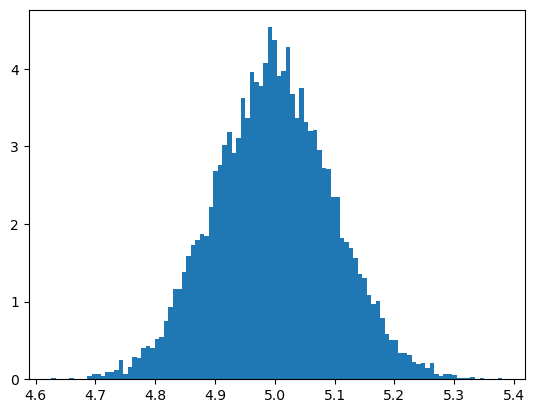

In [61]:
np.random.seed(0)
meas1 = np.random.normal(5.0, 0.1, 10000)

plt.hist(meas1,100,density=True)

# Other Miscellaneous Topics
Here are some other topic you can explore on your own. I go to a web browser and google `matplotlib whatever` to find things out or refresh my memory.

## More Plot Options
* `lw` - line width
* `ms` - marker size
* `mfc` - marker face color
* `mec` - marker edge color
* `mew` - marker edge width

## More Colors
* names - 'red', etc. But also X11 colors like 'DodgeBlue'
* hex - '#ff8022' in rrggbb format
* RGB tuples - like `color=(0,0,1)`, rgb values range from 0 to 1
* RGBA tuple - like `color=(0,1,.5,.3)` where A is transparency

## Adding Text Labels to Plots
The basic call is `ax.text(x,y,string)`

In [7]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()